In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from skimage.io import imread
from skimage.color import rgb2gray

In [2]:
dataset = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = dataset.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
y_train.shape

(60000,)

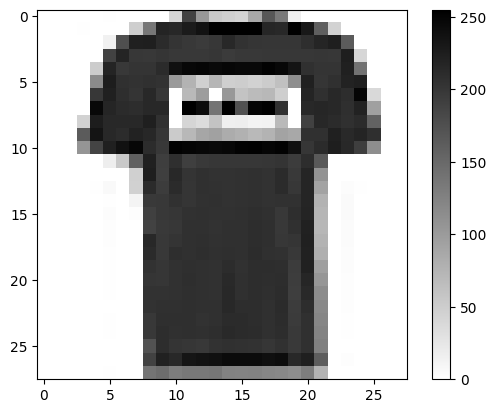

In [5]:
plt.figure()
plt.imshow(X_train[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# one-hot encoding untuk label
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
model = tf.keras.Sequential([
    Conv2D(28, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax"),


])
model.summary()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        16,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,690 (869.88 KB)

 Trainable params: 222,690 (869.88 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Kompilasi model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
# melatih model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.6721 - loss: 0.8835 - val_accuracy: 0.8474 - val_loss: 0.4201
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.8313 - loss: 0.4662 - val_accuracy: 0.8670 - val_loss: 0.3680
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.8529 - loss: 0.4049 - val_accuracy: 0.8776 - val_loss: 0.3307
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.8700 - loss: 0.3681 - val_accuracy: 0.8890 - val_loss: 0.3033
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.8761 - loss: 0.3418 - val_accuracy: 0.8855 - val_loss: 0.3034
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.8808 - loss: 0.3223 - val_accuracy: 0.8936 - val_loss: 0.2891
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.8841 - loss: 0.3160 - val_accuracy: 0.8984 - val_loss: 0.2738
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8909 - loss: 0.2958 - 

In [11]:
test_loss, test_acc = model.evaluate(X_test,  y_test_one_hot)

print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9033 - loss: 0.2654

Test accuracy: 0.9018999934196472


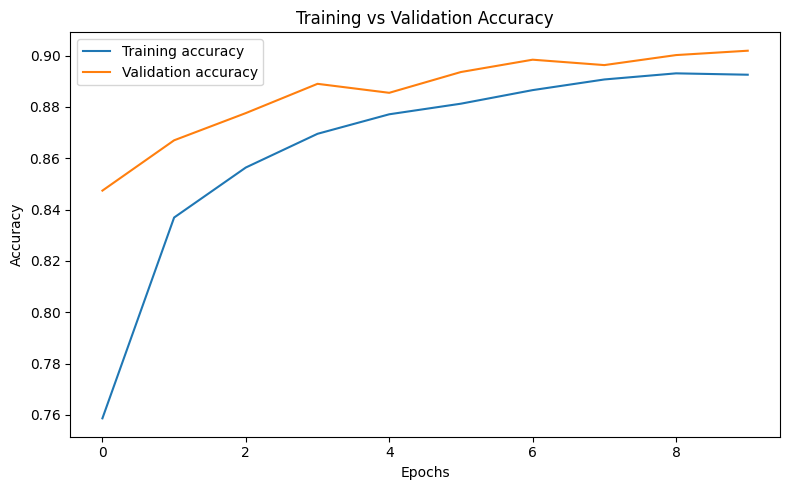

In [12]:
# Visualisasi hasil pelatihan
# plot akurasi
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.tight_layout()
plt.show()

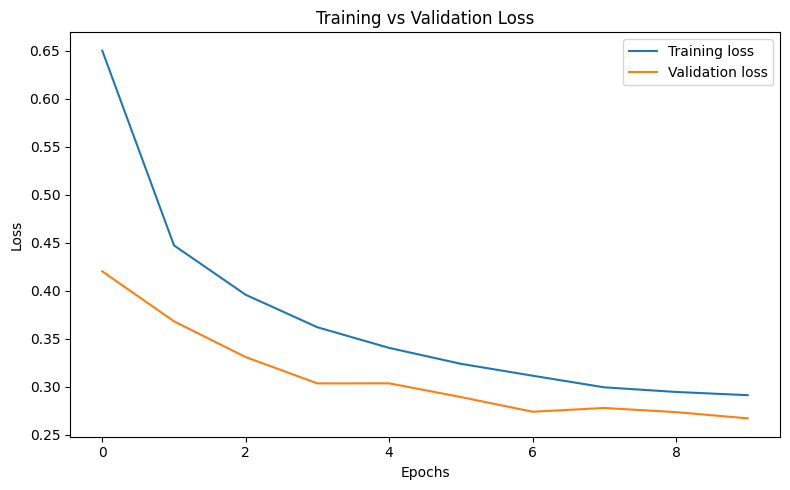

In [13]:
# plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.tight_layout()
plt.show()

Prediksi dari beberapa gambar dari data uji
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


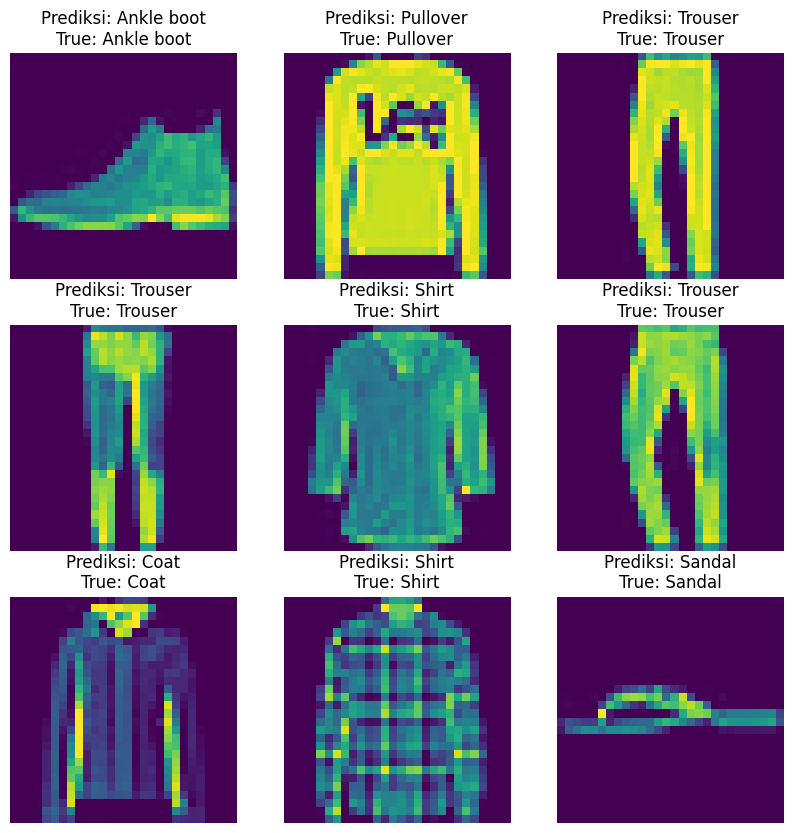

In [14]:
# menampilkan prediksi pada data uji
def show_prekdiksi():
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_test[i])
        pred_class = np.argmax(model.predict(X_test[i:i+1])) # prediksi kelas
        true_class = y_test[i]
        plt.title(f"Prediksi: {class_names[pred_class]}\nTrue: {class_names[true_class]}")
        plt.axis("off")
    plt.show()

print("Prediksi dari beberapa gambar dari data uji")
show_prekdiksi()

In [15]:
def prediksi_citra(dataGambar, index):
    prediksi = model.predict(dataGambar)
    return np.argmax(prediksi[index])

In [16]:
tes = prediksi_citra(X_test, 0)
print(tes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 
9


In [20]:
lokasi = 'sepatu.jpg'
img = cv2.imread(lokasi, cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
if np.mean(img2) > 127:
    img2 = 255 - img2
img2 = img2.astype('float32') / 255.0
img2 = np.expand_dims(img2, axis=0)
a = prediksi_citra(img2, 0)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


4

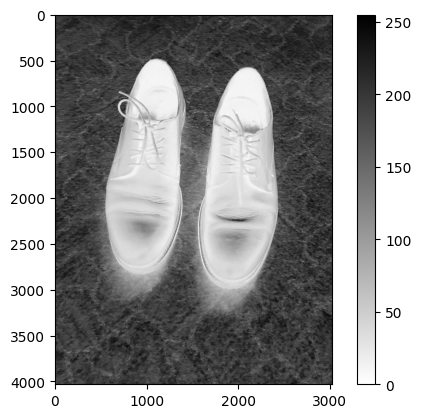

In [21]:
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()